In [19]:
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
Tair_df = pd.read_csv(r"C:\Users\Abhilash Mittal\Desktop\WChangri_2014_Tair.csv")
Tair_df

,Date,Julian Day,Tair
0,11-04-2014 0:00,101,-12.0260
1,11-04-2014 0:30,101,-12.4840
2,11-04-2014 1:00,101,-12.7960
3,11-04-2014 1:30,101,-12.2580
4,11-04-2014 2:00,101,-12.1280
...,...,...,...
5275,29-07-2014 21:30,210,1.5866
5276,29-07-2014 22:00,210,1.4541
5277,29-07-2014 22:30,210,1.3289
5278,29-07-2014 23:00,210,1.3768


In [21]:
julian_day = Tair_df['Julian Day'].tolist()
Tair = Tair_df['Tair'].tolist()

In [26]:
pdd = [] #this will store 15 days PDD
#let's divide the Tair into 15 days chuncks

for i in range(0, len(Tair), 720):
    chunk_temp = Tair[i:i+720]
    pdd.append(sum([s for s in chunk_temp if s > 0]) / 48)
pdd

[0.003162145833333333,
 4.50572369375,
 14.66163621937499,
 19.607029741666672,
 38.71167595624997,
 38.744087145833355,
 37.897412458333335,
 6.588718695833332]

In [27]:
jd1 = [] 
jd2 = []
ob_day = []
for i in range(0, len(julian_day), 720):
    chunk = julian_day[i:i+720]
    jd1.append(chunk[0])
    jd2.append(chunk[-1])
    ob_day.append(chunk[-1] - chunk[0] + 1)
ob_day

[15, 15, 15, 15, 15, 15, 15, 5]

In [28]:
pdd_abn_data = pd.DataFrame()
pdd_abn_data['jd1'] = jd1
pdd_abn_data['jd2'] = jd2
pdd_abn_data['ob_day'] = ob_day
pdd_abn_data['pdd'] = pdd

pdd_abn_data

,jd1,jd2,ob_day,pdd
0,101,115,15,0.003162
1,116,130,15,4.505724
2,131,145,15,14.661636
3,146,160,15,19.607030
4,161,175,15,38.711676
5,176,190,15,38.744087
6,191,205,15,37.897412
7,206,210,5,6.588719


In [29]:
Ablation_data = pd.read_csv(r"C:\Users\Abhilash Mittal\Desktop\WChangri_2014_ablation.csv")
Ablation_data

,JD,Net Ablation(m)
0,101,-0.000027
1,102,0.000277
2,103,-0.000125
3,104,-0.001223
4,105,0.000931
...,...,...
105,206,0.003200
106,207,-0.039100
107,208,-0.015300
108,209,-0.028200


In [31]:
ablations = [] # 15 days ablation
melt_rate = [] #  melt rate
for i in range(0, 110, 15):
    ablations.append(Ablation_data['Net Ablation(m)'][i:i+15].sum()*(-100))

for d, ab in zip(ob_day, ablations):
    melt_rate.append(ab/d)

pdd_abn_data["Ablation(cm)"] = ablations
pdd_abn_data["Observed melt rate (cm/day)"] = melt_rate

pdd_abn_data

,jd1,jd2,ob_day,pdd,Ablation(cm),Observed melt rate (cm/day)
0,101,115,15,0.003162,-0.91458,-0.060972
1,116,130,15,4.505724,3.07258,0.204839
2,131,145,15,14.661636,12.63800,0.842533
3,146,160,15,19.607030,7.92900,0.528600
4,161,175,15,38.711676,24.03100,1.602067
5,176,190,15,38.744087,22.31700,1.487800
6,191,205,15,37.897412,32.51700,2.167800
7,206,210,5,6.588719,10.43000,2.086000


In [32]:
model1_melt_rate = []
for p, d in zip(pdd, ob_day):
    model1_melt_rate.append(8.41231371*p*(10**(-0.51119207))/10/d)
pdd_abn_data["Model1 mr"] = model1_melt_rate

model3_melt_rate = []
for p, d in zip(pdd, ob_day):
    model3_melt_rate.append(5.5895138 * p / (1+10/10.32527034)/10/d)
pdd_abn_data["Model3 mr"] = model3_melt_rate

model4_melt_rate = []
for p, d in zip(pdd, ob_day):
    model4_melt_rate.append(4.98921046* p / ((1 + (10/4.3794713) ** 2) ** 0.32203575)/10/d)
pdd_abn_data["Model4 mr"] = model4_melt_rate

pdd_abn_data

,jd1,jd2,ob_day,pdd,Ablation(cm),Observed melt rate (cm/day),Model1 mr,Model3 mr,Model4 mr
0,101,115,15,0.003162,-0.91458,-0.060972,0.000055,0.000060,0.000058
1,116,130,15,4.505724,3.07258,0.204839,0.077875,0.085293,0.083218
2,131,145,15,14.661636,12.63800,0.842533,0.253405,0.277543,0.270790
3,146,160,15,19.607030,7.92900,0.528600,0.338878,0.371159,0.362128
4,161,175,15,38.711676,24.03100,1.602067,0.669074,0.732807,0.714978
5,176,190,15,38.744087,22.31700,1.487800,0.669634,0.733421,0.715576
6,191,205,15,37.897412,32.51700,2.167800,0.655001,0.717393,0.699939
7,206,210,5,6.588719,10.43000,2.086000,0.341629,0.374171,0.365067


In [33]:
julian_day_intervals = []
for i, j in zip(pdd_abn_data['jd1'], pdd_abn_data['jd2']):
    julian_day_intervals.append(str(i) + '-' + str(j))

julian_day_intervals

['101-115',
 '116-130',
 '131-145',
 '146-160',
 '161-175',
 '176-190',
 '191-205',
 '206-210']

Text(0, 0.5, 'Melt rate (cm/day)')

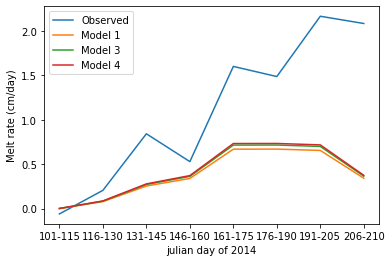

In [36]:
plt.plot(julian_day_intervals, pdd_abn_data['Observed melt rate (cm/day)'], label ='Observed')
plt.plot(julian_day_intervals, pdd_abn_data['Model1 mr'],label ='Model 1')
plt.plot(julian_day_intervals, pdd_abn_data['Model4 mr'],label ='Model 3')
plt.plot(julian_day_intervals, pdd_abn_data['Model3 mr'],label ='Model 4')
plt.legend()
plt.xlabel('julian day of 2014')
plt.ylabel('Melt rate (cm/day)')